# UCI dataset

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm

In [29]:
df = pd.read_csv('forestfires.csv')
df.info

<bound method DataFrame.info of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

## Encoding Data

In [30]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['month']= label_encoder.fit_transform(df['month'])
df['day']= label_encoder.fit_transform(df['day'])
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()
# df.info


In [31]:
def MeanError(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))

## analyzing data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [33]:
def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / (y_test+10e-1)) ) * 100

## Linear regression

822.7432536313236
hello


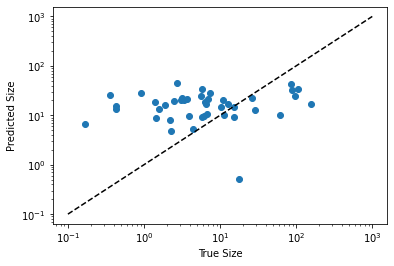

In [34]:
from sklearn.linear_model import LinearRegression

linModel = LinearRegression().fit(x_train, y_train)

linPred = linModel.predict(x_test)

plt.scatter(y_test, linPred)
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
print(mean_absolute_percentage_error(y_test, linPred))
print("hello")

## SVM Regression

linear 82.2414758239325
poly 66.12859421917437
rbf 65.16943161715587
sigmoid 87.74452656459815


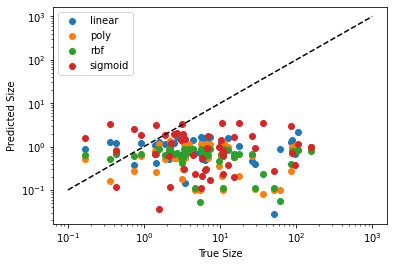

In [35]:
from sklearn.svm import SVR
kernels = ['linear', 'poly', 'rbf', 'sigmoid'];
for k in kernels:
    svmModel = SVR(kernel=k).fit(x_train,y_train)
    svmPredict = svmModel.predict(x_test)
    plt.scatter(y_test, svmPredict, label = k)
    plt.xlabel('True Size')
    plt.ylabel('Predicted Size')
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    print(k, mean_absolute_percentage_error(y_test, svmPredict))
plt.legend(kernels)
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

## KNN regression

r2_score -0.16900517707113072
knnPredict: ( 10 ) : 726.6749569760161
r2_score -0.011987301273401751
knnPredict: ( 60 ) : 712.4707758619394
r2_score -0.0838324810648774
knnPredict: ( 110 ) : 817.6572907906758
r2_score -0.15257372802265956
knnPredict: ( 160 ) : 915.6732064465491
r2_score -0.09170232219695862
knnPredict: ( 210 ) : 857.7607568165573


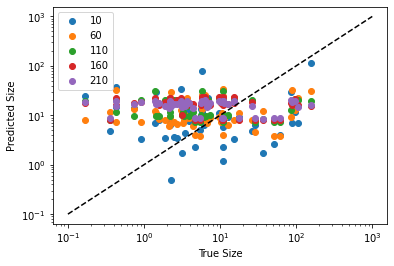

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

for i in range(10,211,50):
    knnModel = KNeighborsRegressor(n_neighbors = i).fit(x_train, y_train)
    knnPredict = knnModel.predict(x_test)
    plt.scatter(y_test, knnPredict)
    plt.xlabel('True Size')
    plt.ylabel('Predicted Size')
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    plt.gca().set_yscale("log")
    print("r2_score", r2_score(y_test, knnPredict))
    print("knnPredict: (", i,") :" ,mean_absolute_percentage_error(y_test, knnPredict))
plt.legend([ _ for _ in range(10,211,50) ])
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

## Neural network

In [42]:
x_train.shape

(413, 12)

In [49]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# load dataset
# dataframe = read_csv("housing.csv", delim_whitespace=True, header=None)
# dataset = dataframe.values
# split into input (X) and output (Y) variables

# print(shape(x_train))
X = x_train
Y = y_train
# define base model 
# ye kya kiya copy paste answerrrrrrrrrrrrrrrrrrrrrrrrrrrr
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense( 413 , input_dim=12, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -5129.33 (9543.67) MSE


Iteration 1, loss = 7180.24631361
Iteration 2, loss = 6928.22797498
Iteration 3, loss = 6688.39432224
Iteration 4, loss = 6452.80444151
Iteration 5, loss = 6233.03089819
Iteration 6, loss = 6020.60996499
Iteration 7, loss = 5817.42622220
Iteration 8, loss = 5624.88938296
Iteration 9, loss = 5439.50497351
Iteration 10, loss = 5262.41856507
Iteration 11, loss = 5087.37073706
Iteration 12, loss = 4922.65972465
Iteration 13, loss = 4761.91758806
Iteration 14, loss = 4609.81595685
Iteration 15, loss = 4469.51030657
Iteration 16, loss = 4335.76788605
Iteration 17, loss = 4208.59722605
Iteration 18, loss = 4093.40616093
Iteration 19, loss = 3992.34188945
Iteration 20, loss = 3894.52326885
Iteration 21, loss = 3799.80480122
Iteration 22, loss = 3714.15658558
Iteration 23, loss = 3630.81787157
Iteration 24, loss = 3556.05421800
Iteration 25, loss = 3485.19308399
Iteration 26, loss = 3419.97435609
Iteration 27, loss = 3361.02394013
Iteration 28, loss = 3308.45532898
Iteration 29, loss = 3263.599

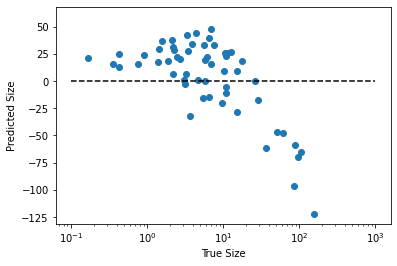

In [60]:
from sklearn.neural_network import MLPRegressor

nnModel = MLPRegressor(hidden_layer_sizes=(),max_iter=10000, verbose=True).fit(x_train, y_train)
nnPredict = nnModel.predict(x_test)

plt.scatter(y_test, nnPredict - y_test)
# plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
plt.plot([.1,20,1000],[0,0,0],c='k',linestyle='--')
plt.gca().set_xscale('log')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
print("r2_score", r2_score(y_test, nnPredict))
print("nnPredict: ",mean_absolute_percentage_error(y_test, nnPredict))